# Assignment-2

## Data Visualization and Pre-processing

### 1.Importing the required libraries

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 2.Loading Dataset

In [237]:
df = pd.read_csv (r'Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 3 Perform Below Visualizations

### 3.1 Univariate Analysis

In [239]:
sns.set(style='whitegrid',palette='muted',color_codes=True)

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


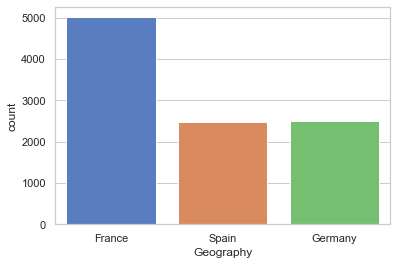

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


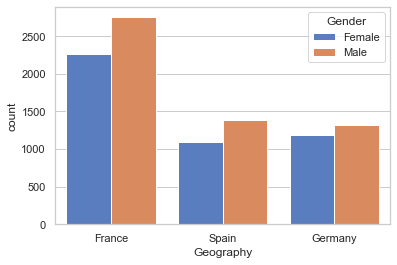

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


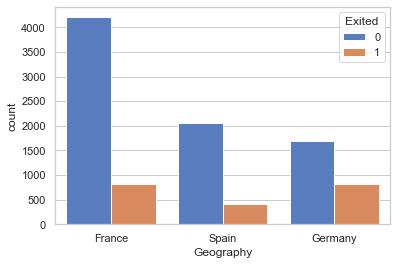

In [240]:

sns.countplot(df.Geography)
plt.show()

sns.countplot(df.Geography,hue=df.Gender)
plt.show()



sns.countplot(df.Geography,hue=df.Exited)
plt.show()

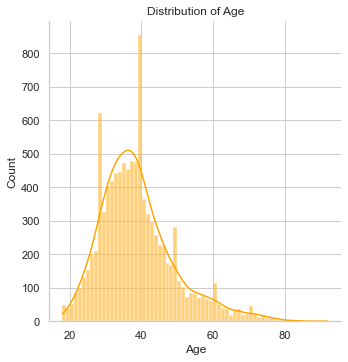

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


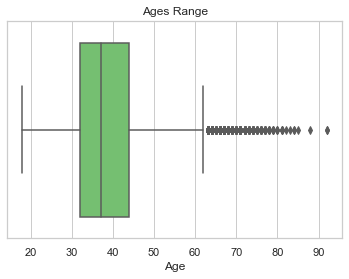

In [241]:
#Distribution

#Frequncy Distribution

sns.displot(df.Age,kde=True,color='orange').set(title="Distribution of Age")
plt.show()

sns.boxplot(df.Age,color="g").set(title="Ages Range")

plt.show()

[Text(0.5, 1.0, 'Age Distribution')]

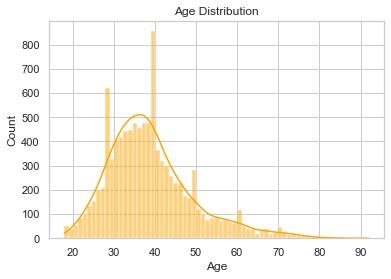

In [242]:
sns.histplot(df.Age, kde = True,color='orange').set(title = 'Age Distribution')

we find that very few people applied for credit cards after turning 50. Also, people between the ages of 20 and 40 applied the most as compared to other groups

[Text(0.5, 1.0, 'Bank Balance Distribution')]

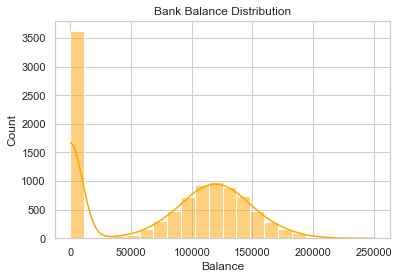

In [243]:
sns.histplot(df.Balance, kde = True,color='orange').set(title = 'Bank Balance Distribution')

The above histogram tends to show that majority of people with around 125k of balance tend to possess credit cards 

Text(38.54343723958334, 0.5, 'Estimated Salary')

<Figure size 1440x1440 with 0 Axes>

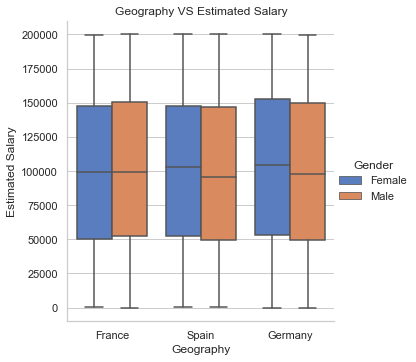

In [244]:
plt.figure(figsize=(20,20))
sns.catplot(x="Geography", y="EstimatedSalary", hue="Gender", kind="box", data=df)
plt.title("Geography VS Estimated Salary")
plt.xlabel("Geography")
plt.ylabel("Estimated Salary")

we see that male customer estimated average salary is higher than females in France and Spain, however in Germany female customers estimated average salary is higher

### 3.2 Bivariate Analysis

In [245]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


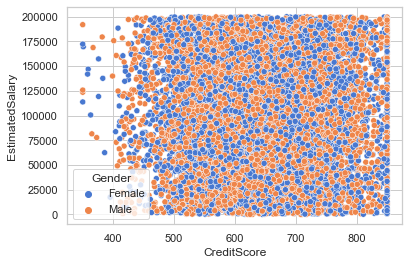

In [246]:
sns.scatterplot(x="CreditScore", y="EstimatedSalary",data=df,hue="Gender")
plt.show()

[Text(0.5, 1.0, 'linear relationship between the Age and the CreditScore ')]

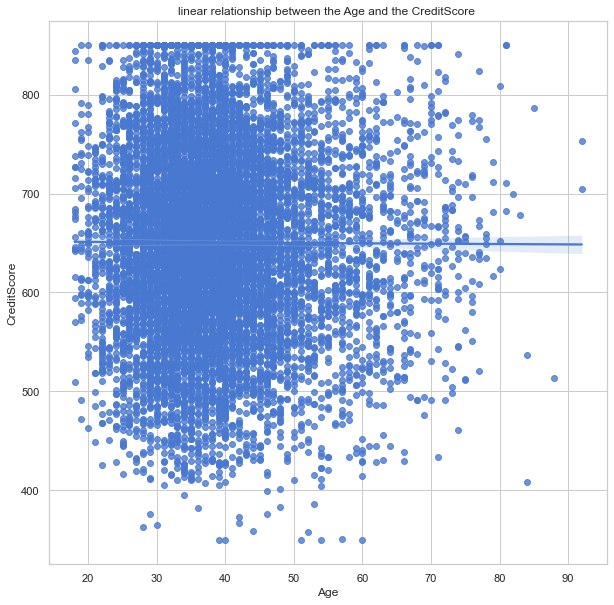

In [247]:
 
plt.figure(figsize=(10,10))
sns.regplot(x="Age", y="CreditScore", data=df).set(title="linear relationship between the Age and the CreditScore ")

### 3.3 Multi Variate Analysis

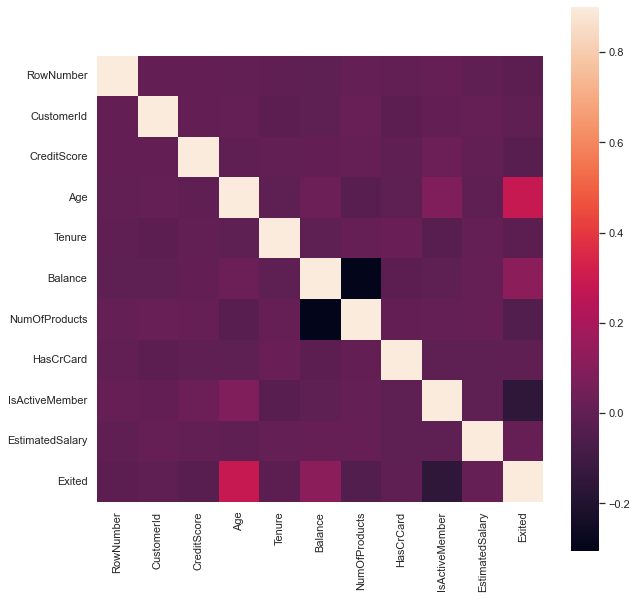

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [248]:
correlations=df.corr()
fig=plt.figure(figsize=(10,10))
sns.heatmap(correlations,vmax=.9,square=True)
plt.show()
correlations


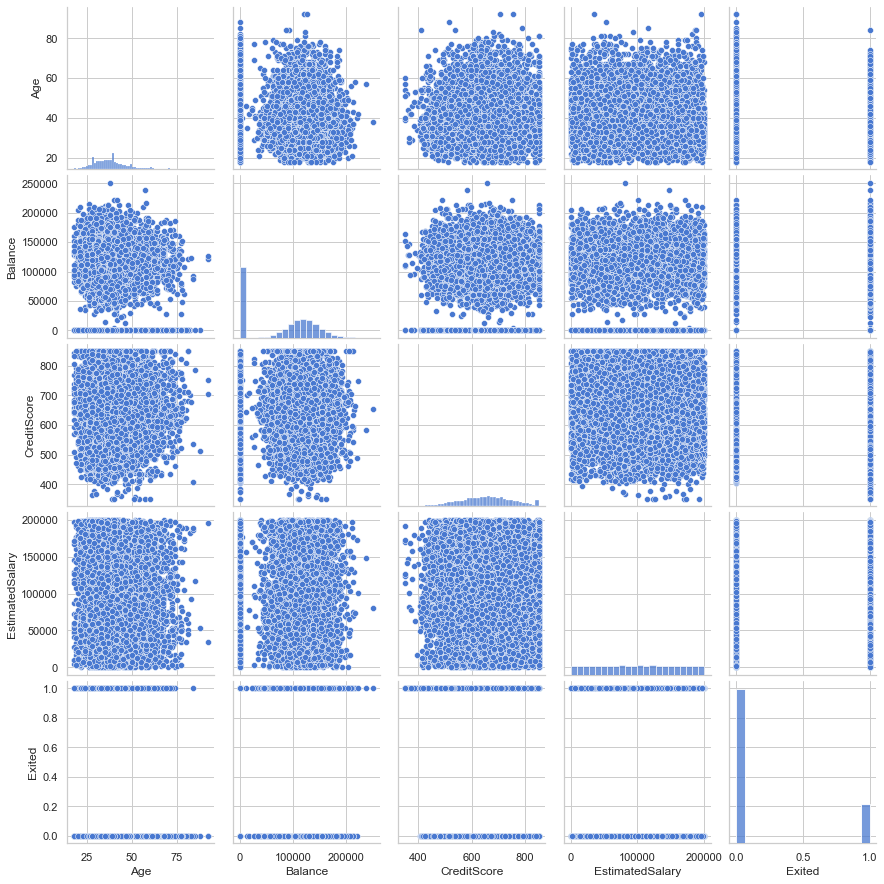

In [249]:
sns.pairplot(data=df[['Age', 'Balance', 'CreditScore', 'EstimatedSalary','Exited']])
plt.show()

Making the analysis based on some of the continuous variables of the dataset

### 4.Descriptive Statistics

In [250]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


1) The Minimum age to have credit is 18
2) The Maximum age to have credit is 92
3) The average age of the customers with credit is around 38
4) The average bank balance of the customers with credit is around 77k USD
5) The average Estimated Salary of the customers with credit is around 100k USD
6) The average credit score of the customers with credit is around 650.

In [251]:
df.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


### 5.Handling Missing Values

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [253]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [254]:
missing_data=df.isnull()
missing_data.sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [255]:
for col in missing_data.columns.values.tolist():
    print(col)
    print(missing_data[col].value_counts())
    print("")

RowNumber
False    10000
Name: RowNumber, dtype: int64

CustomerId
False    10000
Name: CustomerId, dtype: int64

Surname
False    10000
Name: Surname, dtype: int64

CreditScore
False    10000
Name: CreditScore, dtype: int64

Geography
False    10000
Name: Geography, dtype: int64

Gender
False    10000
Name: Gender, dtype: int64

Age
False    10000
Name: Age, dtype: int64

Tenure
False    10000
Name: Tenure, dtype: int64

Balance
False    10000
Name: Balance, dtype: int64

NumOfProducts
False    10000
Name: NumOfProducts, dtype: int64

HasCrCard
False    10000
Name: HasCrCard, dtype: int64

IsActiveMember
False    10000
Name: IsActiveMember, dtype: int64

EstimatedSalary
False    10000
Name: EstimatedSalary, dtype: int64

Exited
False    10000
Name: Exited, dtype: int64



There are no missing values in the given dataset

### 6.Outliers

RowNumber             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
CustomerId         AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
CreditScore           AxesSubplot(0.125,0.677439;0.352273x0.0920732)
Age                AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
Tenure                AxesSubplot(0.125,0.566951;0.352273x0.0920732)
Balance            AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
NumOfProducts         AxesSubplot(0.125,0.456463;0.352273x0.0920732)
HasCrCard          AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
IsActiveMember        AxesSubplot(0.125,0.345976;0.352273x0.0920732)
EstimatedSalary    AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
Exited                AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

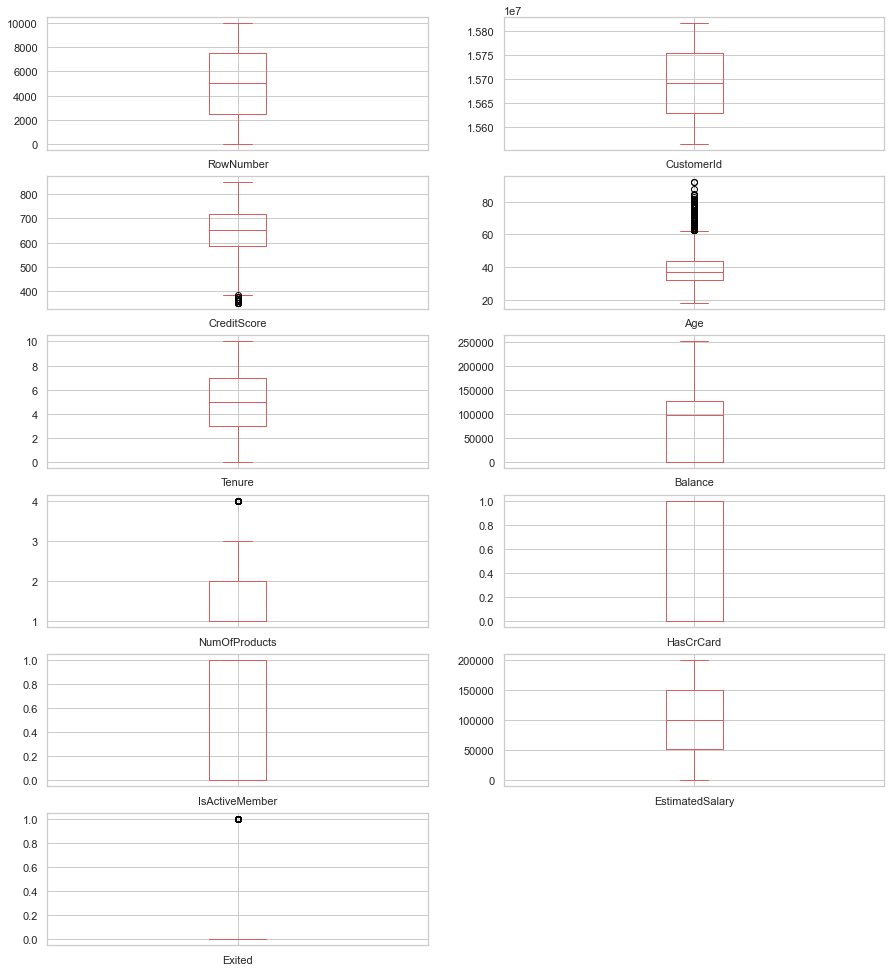

In [256]:
# outliers using the Box plots 
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20),color='r')

In the above plot, Exited, Age and CreditScores have outliers in them which means they are either an anomaly or an exception.

C:\Users\GarenaIT\AppData\Local\Temp\ipykernel_4904\912212840.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_mean = x.mean()


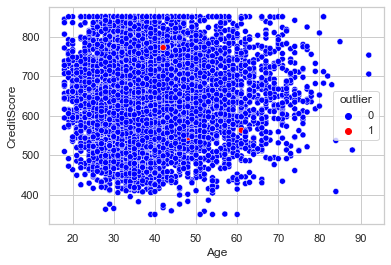

In [257]:
def distance_outlier(x,cutoff):
    result1 = pd.Series([0] * len(x))
    data_mean = x.mean() 
    dist = np.sqrt(np.sum(((x-data_mean) ** 2),axis=1)) 
    dist_mean = dist.mean() 
    dist_zscore = np.abs((dist - dist_mean) / dist.std())
    result1[((dist_zscore > cutoff))] = 1
    return result1
euc_d = df[["Age","CreditScore"]].copy()
df['outlier'] = distance_outlier(df,3)

sns.scatterplot(x="Age",y="CreditScore",data=df,hue="outlier",palette=["blue","red"])
plt.show()

The red points in the plot shows the outliers.

### 7.Categorical Values Encoding

In [258]:
X = df[["CreditScore", "Geography", "Gender", "Age", "Tenure", "EstimatedSalary"]].values
Y=df[["Exited"]]
X[0:5], Y[0:5]

(array([[619, 'France', 'Female', 42, 2, 101348.88],
        [608, 'Spain', 'Female', 41, 1, 112542.58],
        [502, 'France', 'Female', 42, 8, 113931.57],
        [699, 'France', 'Female', 39, 1, 93826.63],
        [850, 'Spain', 'Female', 43, 2, 79084.1]], dtype=object),
    Exited
 0       1
 1       0
 2       1
 3       0
 4       0)

In [259]:

geography=preprocessing.LabelEncoder()
geography.fit(["France", "Spain", "Germany"])
X[:,1]=geography.transform(X[:,1])


In [260]:

gender = preprocessing.LabelEncoder()
gender.fit(["Female", "Male"])
X[:,2]=gender.transform(X[:,2])

### 8.Splitting into dependent and independent variables

In [261]:
independent_catagory = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']].values
independent_catagory

array([[619, 'France', 'Female', ..., 2, 0.0, 101348.88],
       [608, 'Spain', 'Female', ..., 1, 83807.86, 112542.58],
       [502, 'France', 'Female', ..., 8, 159660.8, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 7, 0.0, 42085.58],
       [772, 'Germany', 'Male', ..., 3, 75075.31, 92888.52],
       [792, 'France', 'Female', ..., 4, 130142.79, 38190.78]],
      dtype=object)

In [262]:
dependent_value = df[['Exited']].values
dependent_value

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

### 9.Scale the independent variables

In [263]:

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

### 10.Splitting the data into training and testing

In [264]:

X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.2, random_state=2)
X_trainset.shape


(8000, 6)

In [265]:
X_testset.shape

(2000, 6)

In [266]:
Y_trainset.shape

(8000, 1)

In [267]:
Y_testset.shape

(2000, 1)